In [42]:
import numpy as np
import gym
from gym import wrappers
import time as tm
from gym.envs.toy_text import frozen_lake
import matplotlib.pyplot as plt

In [35]:
# https://github.com/malzantot/ReinforcementLearning_examples
# https://github.com/dxganta/solving_openai/blob/master/FrozenLake8x8/frozenLake8x8.py 
# https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py
"""
Adapted from the Solving FrozenLake8x8 environment using Value-Itertion by Moustafa Alzantot and Diganta Kalita
"""

import numpy as np
import gym
from gym import wrappers


def run_episode(env, policy, gamma = 1.0, render = False):
    """ Evaluates policy by using it to run an episode and finding its
    total reward.

    args:
    env: gym environment.
    policy: the policy to be used.
    gamma: discount factor.
    render: boolean to turn rendering on/off.

    returns:
    total reward: real value of the total reward recieved by agent under policy.
    """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward


def evaluate_policy(env, policy, gamma = 1.0,  n = 10000):
    """ Evaluates a policy by running it n times.
    returns:
    average total reward
    """
    scores = [
            run_episode(env, policy, gamma = gamma, render = False)
            for _ in range(n)]
    return np.mean(scores), np.max(scores)

def extract_policy(v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.P[s][a]:
                # next_sr is a tuple of (probability, next state, reward, done)
                p, s_, r, _ = next_sr
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    return policy


def value_iteration(env, gamma = 1.0, max_iterations = 100000):
    """ Value-iteration algorithm """
    v = np.zeros(env.nS)  # initialize value-function
    
    eps = 1e-20
    converged_at = 0
    for i in range(max_iterations):
        prev_v = np.copy(v)
        for s in range(env.nS):
            q_sa = [sum([p*(r + prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)] 
            v[s] = max(q_sa)
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            print ('Value-iteration converged at iteration# %d.' %(i+1))
            converged_at = i+1
            break
    return v, converged_at

def compute_policy_v(env, policy, gamma=1.0):
    """ Iteratively evaluate the value-function under policy.
    Alternatively, we could formulate a set of linear equations in iterms of v[s] 
    and solve them to find the value function.
    """
    v = np.zeros(env.nS)
    eps = 1e-10
    converged_at = 0
    while True:
        prev_v = np.copy(v)
        for s in range(env.nS):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, _ in env.P[s][policy_a]])
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            # value converged
            break
    return v

def policy_iteration(env = gym.make('FrozenLake8x8-v1', desc=None, is_slippery=True), gamma = 1.0, 
                     max_iterations = 100000):
    """ Policy-Iteration algorithm """
    policy = np.random.choice(env.nA, size=(env.nS))  # initialize a random policy
    
    gamma = 1.0
    coverged_at = 0
    for i in range(max_iterations):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(old_policy_v, gamma)
        if (np.all(policy == new_policy)):
            print ('Policy-Iteration converged at step %d.' %(i+1))
            coverged_at = (i+1)
            break
        policy = new_policy
    return policy, coverged_at

def get_env(env_name):
  """ This function takes the environment name and return the environment after resetting 
  input: env_name -> string
  return: env -> the environment object
  """
  env = gym.make(env_name)
  env.reset() # reset environment to a new, random state
  return env

def frame_builder(env):
  """  this function take the env and take actions till the game done and return the frames of the game

  Input:  
      env -> environment object
  Output:
      frames -> list of dictionaries as each frame has [{action, frame, reward, state},....]
  """
  env.render()  
  epochs = 0
  penalties, reward = 0, 0
  frames = []
  done = False
  state =  env.reset()
  while not done:
    # automatically selects one random action 
      action = env.action_space.sample()
      state, reward, done, info = env.step(action)

      if reward == -10:
          penalties += 1

      # Put each rendered frame into dict for animation
      frames.append({
          'frame': env.render(mode='ansi'),
          'state': state,
          'action': action,
          'reward': reward
          }
      )
      epochs += 1
  return frames


In [39]:
grid_size = 20
custom_map = frozen_lake.generate_random_map(size=grid_size, p=0.9)
gamma = 1.0
env = gym.make("FrozenLake-v1", desc=custom_map)
optimal_v = value_iteration(env, gamma);
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))
frames = frame_builder(env)

Value-iteration converged at iteration# 8521.
Action Space Discrete(4)
State Space Discrete(400)

SFFFFFFFFFFFFFFFHFFF
FFFFFFFFFFHFFFFHFFFF
FHFFFFFFFFFFFFFHFFFF
FFHFFFFFHFFFFFFFFFFF
HFHFHFFHFFFFFFFFFFFH
FFFFFFFFFFFFFFHFHFFF
FFFFFFFFFFFFFFFFFFFF
FFFFFFHFFHFFFFFFFFFF
FFFHFFFFHFFFFFFFFFFF
FFFFFFFFFFFFFFFFFFFF
FFHFFHFFFFFFFHFHFFFF
FFFFFFFFFFHFFFFFFFHF
FFFFHFHFFFFFFFFFFFFF
FFFFFFHFHHFFHFFFFFFF
FFFHFHFFFFFFFFHHFFFF
FFFFFFFFFFHFFFFFHFFH
FFFFFFFFFFFFFFFFFFHF
HFFFFFFFFFFFFFFFFFFF
FFFFFFFHFFHFFFFFFFFF
FFFFFFHFFHFFFFFFFHFG


In [40]:
time_array_policy=[]
time_array_value=[]
gamma_arr=[]
iters_policy=[]
iters_value=[]
scores_value_max=[]
scores_value_mean=[]
scores_policy_max=[]
scores_policy_mean=[]
gamma_arr = [0.1,0.2,0.3,0.4,0.5, 0.9, 0.95, 0.99]
### POLICY ITERATION AND VALUE ITERATIONS ####
for gamma in gamma_arr :
    # policy iteations 
    st=tm.time()
    best_policy,converged_at = policy_iteration(env, gamma )
    mean_score, max_score = evaluate_policy(env, best_policy, gamma )
    end=tm.time()
    scores_policy_mean.append(mean_score)
    scores_policy_max.append(max_score)
    iters_policy.append(converged_at)
    time_array_policy.append(end-st)
    
    # Value Iteration
    st=tm.time()
    best_policy,converged_at = value_iteration(env, gamma )
    mean_score, max_score = evaluate_policy(env, best_policy, gamma )
    end=tm.time()
    scores_value_mean.append(mean_score)
    scores_value_max.append(max_score)
    iters_value.append(converged_at)
    time_array_value.append(end-st)

Policy-Iteration converged at step 12.
Value-iteration converged at iteration# 8521.
Policy-Iteration converged at step 31.
Value-iteration converged at iteration# 8521.
Policy-Iteration converged at step 11.
Value-iteration converged at iteration# 8521.
Policy-Iteration converged at step 12.
Value-iteration converged at iteration# 8521.
Policy-Iteration converged at step 31.
Value-iteration converged at iteration# 8521.
Policy-Iteration converged at step 14.
Value-iteration converged at iteration# 8521.
Policy-Iteration converged at step 13.
Value-iteration converged at iteration# 8521.
Policy-Iteration converged at step 13.
Value-iteration converged at iteration# 8521.


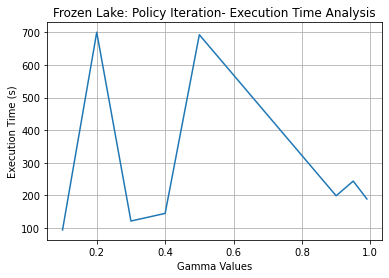

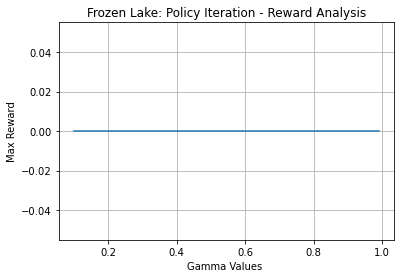

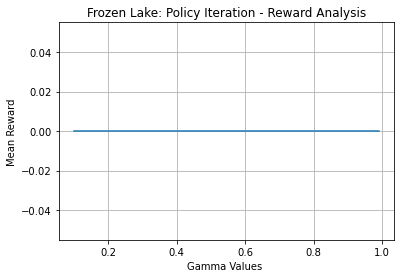

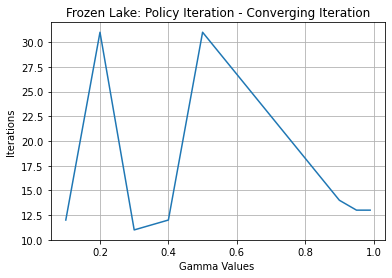

In [43]:
plt.plot(gamma_arr, time_array_policy)
plt.xlabel('Gamma Values')
plt.title('Frozen Lake: Policy Iteration- Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.show()

plt.plot(gamma_arr,scores_policy_max)
plt.xlabel('Gamma Values ')
plt.ylabel('Max Reward')
plt.title('Frozen Lake: Policy Iteration - Reward Analysis')
plt.grid()
plt.show()

plt.plot(gamma_arr,scores_policy_mean)
plt.xlabel('Gamma Values ')
plt.ylabel('Mean Reward')
plt.title('Frozen Lake: Policy Iteration - Reward Analysis')
plt.grid()
plt.show()


plt.plot(gamma_arr,iters_policy)
plt.xlabel('Gamma Values ')
plt.ylabel('Iterations ')
plt.title('Frozen Lake: Policy Iteration - Converging Iteration')
plt.grid()
plt.show()

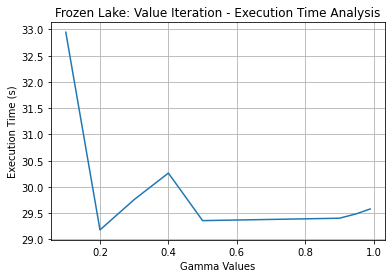

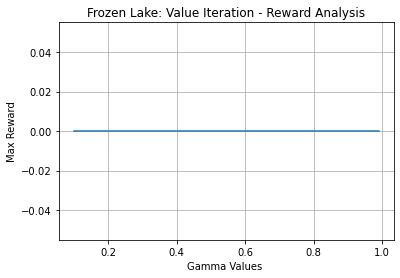

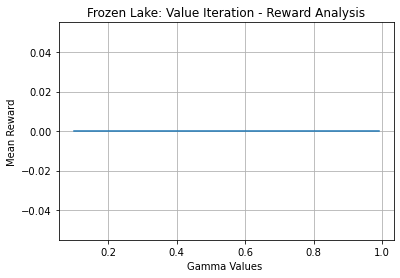

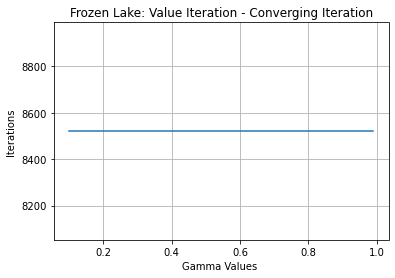

In [44]:
plt.plot(gamma_arr, time_array_value)
plt.xlabel('Gamma Values')
plt.title('Frozen Lake: Value Iteration - Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.show()

plt.plot(gamma_arr,scores_value_max)
plt.xlabel('Gamma Values ')
plt.ylabel('Max Reward')
plt.title('Frozen Lake: Value Iteration - Reward Analysis')
plt.grid()
plt.show()

plt.plot(gamma_arr,scores_value_mean)
plt.xlabel('Gamma Values ')
plt.ylabel('Mean Reward')
plt.title('Frozen Lake: Value Iteration - Reward Analysis')
plt.grid()
plt.show()

plt.plot(gamma_arr,iters_value)
plt.xlabel('Gamma Values ')
plt.ylabel('Iterations ')
plt.title('Frozen Lake: Value Iteration - Converging Iteration')
plt.grid()
plt.show()

In [45]:
time_array_policy_i=[]
time_array_value_i=[]
gamma_i = 0.99
scores_value_max_i=[]
scores_value_mean_i=[]
scores_policy_max_i=[]
scores_policy_mean_i=[]
iters_policy_i = []
iters_value_i = []
iterat_arr = [10,100, 1000, 2000, 5000, 10000]
### POLICY ITERATION AND VALUE ITERATIONS ####
for num_iter in iterat_arr :
    # policy iteations 
    st=tm.time()
    best_policy,converged_at = policy_iteration(env, gamma_i, num_iter )
    mean_score, max_score = evaluate_policy(env, best_policy, gamma_i, num_iter)
    end=tm.time()
    scores_value_mean_i.append(mean_score)
    scores_policy_mean_i.append(max_score)
    iters_policy_i.append(converged_at)
    scores_policy_mean_i.append(end-st)
    
    # Value Iteration
    st=tm.time()
    best_policy,converged_at = value_iteration(env, gamma, num_iter )
    mean_score, max_score = evaluate_policy(env, best_policy, gamma, num_iter)
    end=tm.time()
    scores_value_mean_i.append(mean_score)
    scores_value_max_i.append(max_score)
    iters_value_i.append(converged_at)
    time_array_value_i.append(end-st)

Policy-Iteration converged at step 12.
Policy-Iteration converged at step 31.
Policy-Iteration converged at step 11.
Policy-Iteration converged at step 9.
Policy-Iteration converged at step 30.
Value-iteration converged at iteration# 8521.


In [23]:
# Q learning 
# https://gist.github.com/jojonki/6291f8c3b19799bc2f6d5279232553d7
ALPHA = 0.1 # learning rate
GAMMA = 0.99 # reward discount
LEARNING_COUNT = 100000
TEST_COUNT = 10000

TURN_LIMIT = 100
IS_MONITOR = False
state_size = 20
class Agent:
    def __init__(self, env, state_size):
        self.env = env
        self.episode_reward = 0.0
        self.q_val = np.zeros(state_size*state_size * 4).reshape(state_size*state_size, 4).astype(np.float32)

    def learn(self):
        # one episode learning
        state = self.env.reset()
        #self.env.render()
        
        for t in range(TURN_LIMIT):
            act = self.env.action_space.sample() # random
            next_state, reward, done, info = self.env.step(act)
            q_next_max = np.max(self.q_val[next_state])
            # Q <- Q + a(Q' - Q)
            # <=> Q <- (1-a)Q + a(Q')
            self.q_val[state][act] = (1 - ALPHA) * self.q_val[state][act]\
                                 + ALPHA * (reward + GAMMA * q_next_max)
            
            #self.env.render()
            if done:
                return reward
            else:
                state = next_state

    def test(self):
        state = self.env.reset()
        for t in range(TURN_LIMIT):
            act = np.argmax(self.q_val[state])
            next_state, reward, done, info = self.env.step(act)
            if done:
                return reward
            else:
                state = next_state
        return 0.0 # over limit


In [46]:

state_size = 10
custom_map = frozen_lake.generate_random_map(size=state_size, p=0.9)
env = gym.make("FrozenLake-v1", desc=custom_map)
agent = Agent(env,state_size)
reward_total = 0.0
for i in range(LEARNING_COUNT):
    reward_total += agent.learn()

print("episodes      : {}".format(LEARNING_COUNT))
print("total reward  : {}".format(reward_total))
print("average reward: {:.2f}".format(reward_total / LEARNING_COUNT))
print("Q Value       :{}".format(agent.q_val))

print("###### TEST #####")
reward_total = 0.0
    
for i in range(TEST_COUNT):
    reward_total += agent.test()
print("episodes      : {}".format(TEST_COUNT))
print("total reward  : {}".format(reward_total))
print("average reward: {:.2f}".format(reward_total / TEST_COUNT))

episodes      : 100000
total reward  : 14.0
average reward: 0.00
Q Value       :[[2.41402816e-03 2.46871123e-03 2.47179531e-03 2.52115936e-03]
 [2.41608359e-03 2.47971923e-03 2.40178872e-03 2.59447237e-03]
 [1.28439942e-03 1.19135575e-03 1.94314099e-03 2.73461477e-03]
 [2.72889994e-03 2.90806079e-03 2.92667700e-03 2.92554777e-03]
 [3.06892581e-03 3.19220545e-03 3.28252092e-03 3.07638035e-03]
 [3.34243360e-03 3.36396624e-03 3.41754290e-03 3.29854921e-03]
 [3.40878591e-03 3.40022589e-03 3.39321117e-03 3.33505846e-03]
 [3.39950947e-03 3.29078990e-03 3.30106611e-03 3.25026852e-03]
 [3.23586189e-03 2.13818019e-03 2.18197075e-03 2.51498795e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.19733780e-03 2.14360561e-03 2.21849722e-03 2.28637992e-03]
 [2.23308033e-03 1.22838491e-03 1.37773808e-03 1.76964235e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00221264e-03 1.24357035e-03 2.29772390e-03 2.23232037e-03]
 [2.95412680e-03 2.97711603e-03 3.2422